# Carregar dataset no colab


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
data.extractall()
data.printdir()

# Matriz de confusão


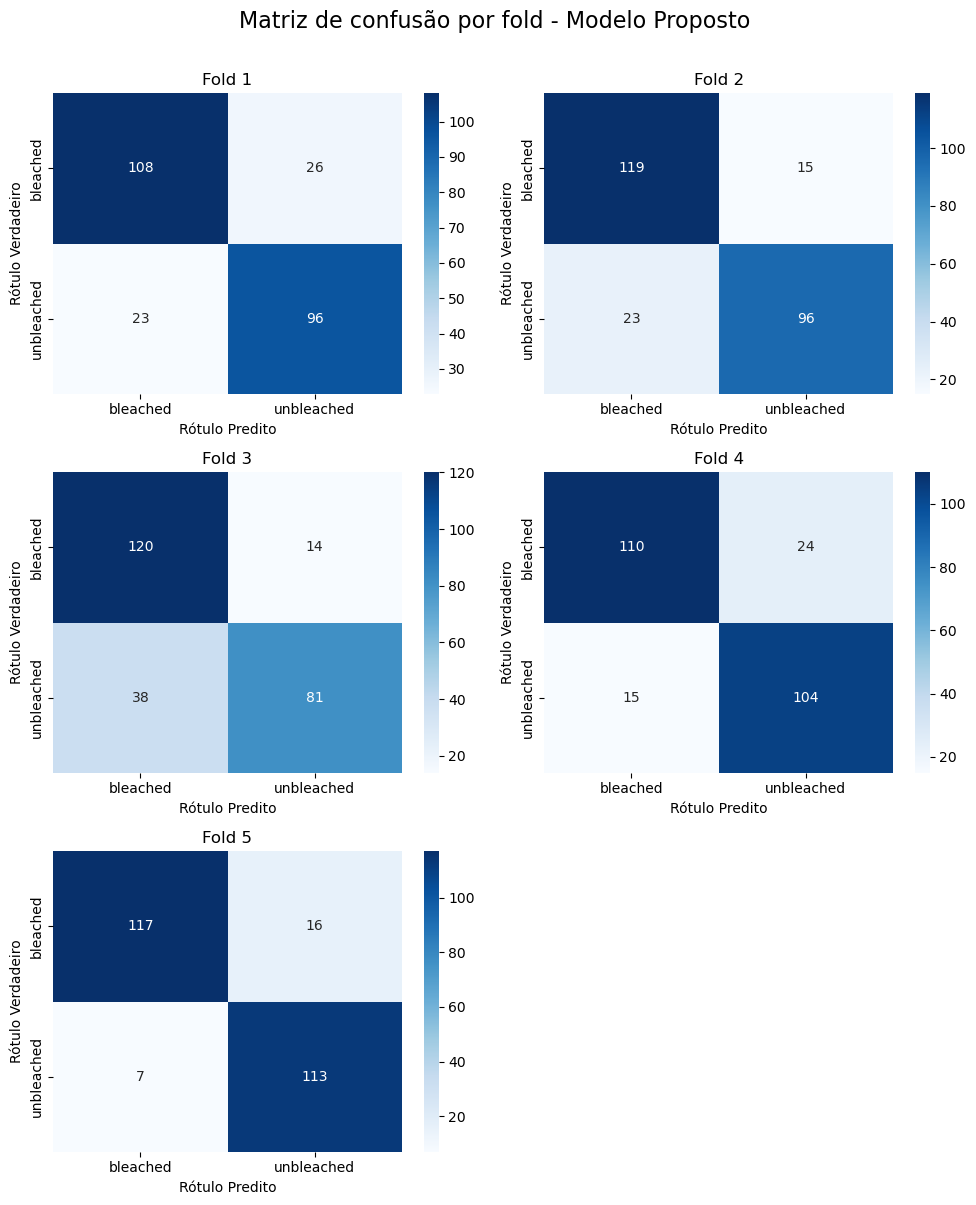

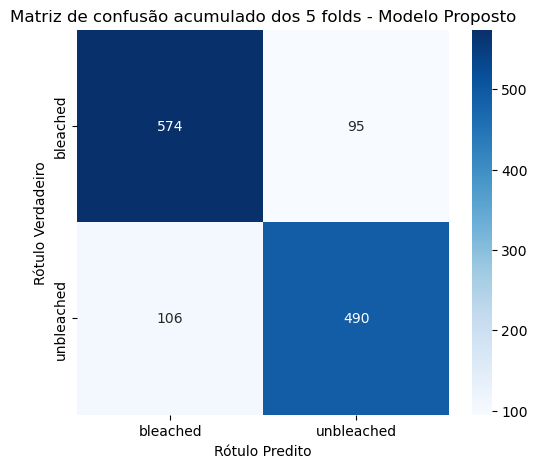

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

confusion_matrices_per_fold = [
    np.array([[108, 26], [23, 96]]),  # Matriz do Fold 1
    np.array([[119, 15], [23, 96]]),   # Matriz do Fold 2
    np.array([[120, 14], [38, 81]]),  # Matriz do Fold 3
    np.array([[110, 24], [15, 104]]),   # Matriz do Fold 4
    np.array([[117, 16], [7, 113]])  # Matriz do Fold 5
]

class_names = ['bleached', 'unbleached'] # Exemplo: ajuste para 'Não Doença', 'Doença', etc.

n_splits = len(confusion_matrices_per_fold)
if n_splits == 0:
    print("Nenhuma matriz de confusão fornecida para plotar.")
else:
    # Inicializa a matriz de confusão total
    num_classes = len(class_names)
    total_cm = np.zeros((num_classes, num_classes))

    # Configura o layout da figura para os subplots dos folds
    # Ajuste 'n_cols' para controlar quantas matrizes por linha
    n_cols = 2 # Ex: 3 matrizes por linha
    n_rows = (n_splits + n_cols - 1) // n_cols # Calcula o número de linhas necessário

    # Tamanho da figura. Ajuste para caber bem na tela, especialmente com mais folds.
    # Cada subplot tem um tamanho base de aproximadamente 5x4 polegadas
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

    # Transforma axes em um array 1D para fácil iteração, se necessário
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    elif n_rows == 1 and n_cols == 1:
        axes = [axes] # Garante que seja uma lista para a iteração

    for fold, cm in enumerate(confusion_matrices_per_fold):
        # Acumula a matriz de confusão para o gráfico total
        total_cm += cm

        ax = axes[fold] # Seleciona o subplot atual

        # Plota a matriz de confusão para o fold atual
        sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_xlabel('Rótulo Predito')
        ax.set_ylabel('Rótulo Verdadeiro')
        ax.set_title(f'Fold {fold+1}')

    # Oculta subplots vazios, se houver
    for i in range(n_splits, n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta layout e reserva espaço para suptitle
    plt.suptitle('Matriz de confusão por fold - Modelo Proposto', y=1.00, fontsize=16) # Título geral
    plt.show()

    # Gráfico de Confusão Acumulado de todos os folds (em uma nova figura)
    plt.figure(figsize=(6, 5)) # Tamanho ligeiramente menor para o gráfico único
    sns.heatmap(total_cm, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Rótulo Predito')
    plt.ylabel('Rótulo Verdadeiro')
    plt.title('Matriz de confusão acumulado dos 5 folds - Modelo Proposto')
    plt.show()

# Outros

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator()

data_flow = datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

X, y = [], []
for i in range(len(data_flow)):
    imgs, labels = data_flow[i]
    X.append(imgs)
    y.append(labels)
    if (i+1)*8 >= data_flow.samples:
        break

X = np.vstack(X)
y = np.hstack(y).astype(int)

print("Dataset carregado:", X.shape, y.shape)

orig_class_indices = dict(data_flow.class_indices)
print("Mapeamento original:", orig_class_indices)

# Keras geralmente mapeia em ordem alfabética: bleached=0, unbleached=1.
# Queremos padronizar: unbleached=0, bleached=1
if orig_class_indices.get('bleached', None) == 0:
    print("⚠️ 'bleached' está como 0. Invertendo labels para padronizar bleached=1.")
    y = 1 - y
    class_indices = {'unbleached': 0, 'bleached': 1}
else:
    class_indices = orig_class_indices

inv_class_indices = {v: k for k, v in class_indices.items()}
label_names = [inv_class_indices[0], inv_class_indices[1]]  # ["unbleached","bleached"]
print("Mapeamento efetivo utilizado:", class_indices)

Found 1265 images belonging to 2 classes.
Dataset carregado: (1265, 224, 224, 3) (1265,)
Mapeamento original: {'bleached': 0, 'unbleached': 1}
⚠️ 'bleached' está como 0. Invertendo labels para padronizar bleached=1.
Mapeamento efetivo utilizado: {'unbleached': 0, 'bleached': 1}


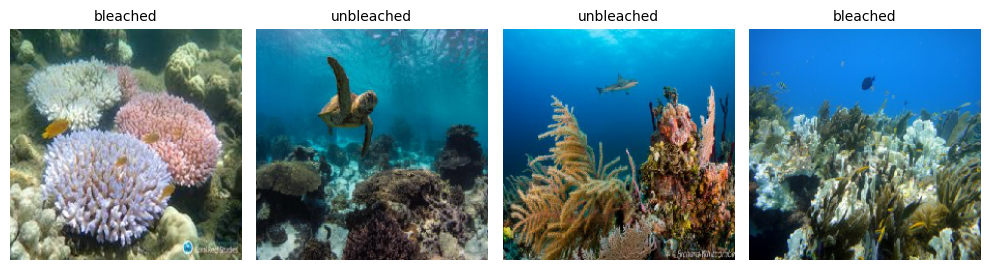

In [44]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.random.choice(len(X), 4, replace=False)

plt.figure(figsize=(10, 3))  # 1 linha, 4 imagens menores

for i, idx in enumerate(indices):
    img = X[idx]
    label = y[idx]
    class_name = inv_class_indices[label]

    plt.subplot(1, 4, i+1)
    plt.imshow(img.astype("uint8"))  # conversão garante melhor qualidade
    plt.title(class_name, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.savefig("exemplos_dataset.png", dpi=300, bbox_inches="tight")  # salva em alta qualidade
plt.show()